<a href="https://colab.research.google.com/github/kelvin373-ht/MachineLearningProgramming/blob/feature%2Fgoogle_colab/submission_machine_learning_pemula_Kelvin_Herwanda_Tandrio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**My Biodata**

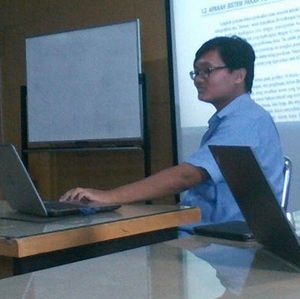


*   Nama   : Kelvin Herwanda Tandrio
*   Alamat : Kota Jakarta Barat, DKI Jakarta


Email. : kelvin373.ht@gmail.com 


# Data Set

Prepare Data Set


---



In [4]:
pip install split_folders

In [5]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-16 22:03:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.4MB/s    in 26s     

2021-07-16 22:03:37 (11.7 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Extrasion Data File .zip


---



In [6]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
import splitfolders

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
base_dir2 = '/tmp/rockpaperscissors'
splitfolders.ratio(base_dir, output = "/tmp/rockpaperscissors", seed = 1337, ratio = (.6, .4))

train_dir = os.path.join(base_dir2, 'train')
val_dir = os.path.join(base_dir2, 'val')

Copying files: 2188 files [00:00, 3646.58 files/s]


In [8]:
os.listdir(train_dir)

['paper', 'scissors', 'rock']

In [9]:
os.listdir(val_dir)

['paper', 'scissors', 'rock']

In [10]:
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

In [11]:
data_paper = os.listdir(paper_dir)
count_data_paper = len(data_paper)
print("Data Paper: ", count_data_paper)

Data Paper:  712


In [12]:
data_rock = os.listdir(rock_dir)
count_data_rock = len(data_rock)
print("Data Rock: ", count_data_rock)

Data Rock:  726


In [13]:
data_scissors = os.listdir(scissors_dir)
count_data_scissors = len(data_scissors)
print("Data Scissors: ", count_data_scissors)

Data Scissors:  750


In [14]:
from sklearn.model_selection import train_test_split

# Set Data Training and Validation for Paper
paper_train, paper_val = train_test_split(data_paper, test_size = 0.4)
print("Data paper train    : ", len(paper_train))
print("Data paper val      : ", len(paper_val))

# Set Data Training and Validation for Rock
rock_train, rock_val = train_test_split(data_rock, test_size = 0.4)
print("Data rock train     : ", len(rock_train))
print("Data rock val       : ", len(rock_val))

# Set Data Training and Validation for Scissors
scissors_train, scissors_val = train_test_split(data_scissors, test_size = 0.4)
print("Data scissors train : ", len(scissors_train))
print("Data scissors val   : ", len(scissors_val))


Data paper train    :  427
Data paper val      :  285
Data rock train     :  435
Data rock val       :  291
Data scissors train :  450
Data scissors val   :  300


In [15]:
# Combine Data Training and Testing
rockpaperscissors_train = paper_train + rock_train + scissors_train
rockpaperscissors_val = paper_val + rock_val + scissors_val

print("Data All Train : ", len(rockpaperscissors_train))
print("Data All Val  : ", len(rockpaperscissors_val))

Data All Train :  1312
Data All Val  :  876


In [16]:
paper_train_dir = os.path.join(train_dir, 'paper')
rock_train_dir = os.path.join(train_dir, 'rock')
scissors_train_dir = os.path.join(train_dir, 'scissors')

paper_val_dir = os.path.join(val_dir, 'paper')
rock_val_dir = os.path.join(val_dir, 'rock')
scissors_val_dir = os.path.join(val_dir, 'scissors')

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [19]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [22]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 45s - loss: 0.9421 - accuracy: 0.5663 - val_loss: 0.8761 - val_accuracy: 0.6375
Epoch 2/20
25/25 - 43s - loss: 0.4469 - accuracy: 0.8350 - val_loss: 0.3111 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 42s - loss: 0.2540 - accuracy: 0.9137 - val_loss: 0.1623 - val_accuracy: 0.9250
Epoch 4/20
25/25 - 42s - loss: 0.2300 - accuracy: 0.9312 - val_loss: 0.2679 - val_accuracy: 0.9062
Epoch 5/20
25/25 - 43s - loss: 0.1581 - accuracy: 0.9500 - val_loss: 0.1827 - val_accuracy: 0.9250
Epoch 6/20
25/25 - 43s - loss: 0.1364 - accuracy: 0.9613 - val_loss: 0.0966 - val_accuracy: 0.9750
Epoch 7/20
25/25 - 42s - loss: 0.1035 - accuracy: 0.9675 - val_loss: 0.1417 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 43s - loss: 0.1010 - accuracy: 0.9663 - val_loss: 0.1410 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 43s - loss: 0.1255 - accuracy: 0.9588 - val_loss: 0.0671 - val_accuracy: 0.9688
Epoch 10/20
25/25 - 42s - loss: 0.0762 - accuracy: 0.9712 - val_loss: 0.1110 - val_accuracy: 0.9500
Epoch 11/

Saving WhatsApp Image 2021-07-17 at 04.39.04 (1).jpeg to WhatsApp Image 2021-07-17 at 04.39.04 (1) (2).jpeg
WhatsApp Image 2021-07-17 at 04.39.04 (1).jpeg
Paper


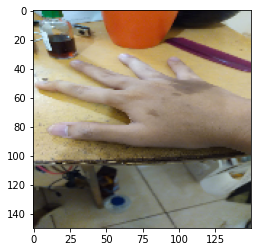

In [31]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if(classes[0][0] == 1):
    print("Paper")
  elif(classes[0][1] == 1):
    print("Rock")
  elif(classes[0][2] == 1):
    print("Scissor")